In [ ]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 29.3 MB/s eta 0:00:00


In [ ]:
 from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import argparse, os
import datetime as dt
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
import glob
import matplotlib
import time
import pdb

from scipy import stats
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from matplotlib.colors import Normalize
from matplotlib.colors import LightSource
from matplotlib.colors import ListedColormap
from datetime import datetime, timedelta
from natsort import natsorted #

In [ ]:
file_path = '/content/drive/My Drive/Colab_Notebooks/Soil_moisture/data/'

In [ ]:
# Step 1: Read the CSV file
csv_file = "AvgInfo_Cluster_ElevBands.csv"
df_sta0 = pd.read_csv(file_path + 'csv/' + csv_file)
df_sta = pd.read_csv(file_path + 'csv/' + csv_file)

#date series
date1=np.arange(pd.to_datetime('2000-1-1'),pd.to_datetime('2001-1-01'),timedelta(days=1))

In [ ]:
df_sta0.columns

Index(['LatGauge', 'LonGauge', 'GAGEID', 'GageID', 'ElevBand', 'SnowOut',
       'Snowmelt', 'Slope', 'Nov1SM', 'MeanWinterSM', 'TheilSenSlope',
       'SpringRunoffVIC', 'SpringRunoffRatioVIC', 'AvgWinterTemp',
       'AvgAnnualTemp', 'PeakSWE', 'WinterPrecip', 'SpringPrecip',
       'PeakSWE_PrecipRatio', 'Apr1SWE', 'OctSM', 'NovSM', 'DOWYPeakSWE',
       'NovTemp', 'DecTemp', 'JanTemp', 'FebTemp', 'NovSWE', 'DecSWE',
       'JanSWE', 'JanSM', 'TheilSenSlopeSpring', 'SlopeSpring',
       'VolSMChangeWint', 'VolSMChangeSp', 'SM_DOWYPeakSWE',
       'VolSMChangeSpringPSWE', 'July31SM', 'SpringRunoffPSWE_VIC',
       'SpringPrecipPSWE', 'WinterPrecipPSWE', 'SpringEvapPSWE',
       'SpringBaseflowPSWE', 'OctPrecip', 'NovPrecip', 'DecPrecip',
       'JanPrecip', 'FebPrecip', 'MarPrecip', 'AprPrecip', 'MayPrecip',
       'JunPrecip', 'JulPrecip', 'Dec1SM', 'Jan1SM', 'Feb1SM', 'Mar1SM',
       'Apr1SM', 'FirstDayBelow0Temp', 'NumbDaysBelow0Temp',
       'MaxConsDaysBelow0Temp', 'FirstDayAbo

### Function to plot seasonal soil moisture with average winter temperature, while days of peak SWE and snow disappearance plotted

In [ ]:
ifile=file_list[num_file]
ifile = os.path.abspath(ifile)
st_nm = ifile.split("\\")[-1].split(".")[0]
st_nm2 = ifile.split("/")[-1].split("_")[1]


NameError: name 'file_list' is not defined

In [ ]:
type(st_nm2)

NameError: name 'st_nm2' is not defined

In [ ]:
staname = 13340600 #11473900

/content/drive/My Drive/Colab_Notebooks/Soil_moisture/data/csv/elevbands_fluxes/flux_13340600_12.csv
/content/drive/My Drive/Colab_Notebooks/Soil_moisture/data/csv/elevbands_fluxes/flux_13340600_13.csv
/content/drive/My Drive/Colab_Notebooks/Soil_moisture/data/csv/elevbands_fluxes/flux_13340600_14.csv
/content/drive/My Drive/Colab_Notebooks/Soil_moisture/data/csv/elevbands_fluxes/flux_13340600_15.csv
/content/drive/My Drive/Colab_Notebooks/Soil_moisture/data/csv/elevbands_fluxes/flux_13340600_16.csv
/content/drive/My Drive/Colab_Notebooks/Soil_moisture/data/csv/elevbands_fluxes/flux_13340600_17.csv
/content/drive/My Drive/Colab_Notebooks/Soil_moisture/data/csv/elevbands_fluxes/flux_13340600_18.csv
0
1
2
3
4
5
6


<ipython-input-30-adc5a8f62a52>:86: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=fig.colorbar(cmap, ticks=ticks1)


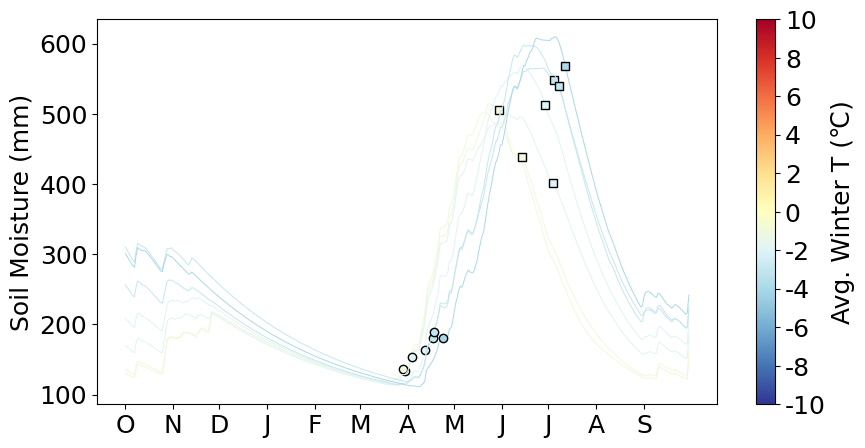

In [ ]:
pattern = file_path + 'csv/elevbands_fluxes/flux_' + str(staname) + '*.csv'

# Get a list of files matching the pattern
file_list = natsorted(glob.glob(pattern))

# Print the sorted list of files
for file in file_list:
    print(file)

fontsize=18
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : fontsize}

matplotlib.rc('font', **font)

#upper limite of avg winter temperature in degree-C
n = 10

c = np.arange(-10, n + 1,2)
norm = matplotlib.colors.Normalize(vmin=c.min(), vmax=c.max())

#color in reverse order to make high temperature red
cmap_sel = mpl.cm.RdYlBu_r
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap = cmap_sel )#cmap=mpl.cm.gray
cmap.set_array([])

#plot start
fig = plt.figure(1,figsize=(10,5))
ax1=fig.add_subplot(111)

dateplot=pd.date_range('1999-10-01',periods=366, freq='D')

for num_file in range(len(file_list)):
  print(num_file)
  ifile=file_list[num_file]
  ifile = os.path.abspath(ifile)
  df_in_fa = pd.read_csv(ifile)

  st_nm = "_".join(ifile.split("/")[-1].split(".")[0].split("_")[1:])
  num_band = (df_sta0[df_sta0['GAGEID'] == (st_nm)]['AvgWinterTemp'])

  df_in_fa1 = df_in_fa[(df_in_fa['Year'] == 1999) & (df_in_fa['Month'] >= 10) ]
  df_in_fa2 = df_in_fa[(df_in_fa['Year'] == 2000) & (df_in_fa['Month'] <= 9) ]

  df_in_fa = pd.concat([df_in_fa1, df_in_fa2], ignore_index=True)

  # df_in_fa1 = df_in_fa1.append(pd.DataFrame(data = df_in_fa2), ignore_index=True)
  # df_in_fa = df_in_fa1
  df_in_fa['SOIL_LIQALL'] = df_in_fa['SOIL_LIQ1'] + df_in_fa['SOIL_LIQ2'] + df_in_fa['SOIL_LIQ3']
  sm_all = df_in_fa[['SOIL_LIQALL']]

  # Separating day of snow out and day of peak swe
  st_nm2 = ifile.split("/")[-1].split("_")[1]
  df_tmp = df_sta0[df_sta0['GageID']== int(st_nm2)]
  df_tmp = df_tmp.sort_values(by='ElevBand')
  df_tmp.columns
  el = df_tmp[['DOWYPeakSWE','SnowOut','ElevBand']] #elev_band
  peak_sw_dy = el.iloc[num_file,0]
  peak_sw_dy_sm = sm_all.iloc[round(peak_sw_dy),0]
  peak_sw_dy = dateplot[round(peak_sw_dy)]

  snowout_dy = el.iloc[num_file,1]
  snowout_dy_sm = sm_all.iloc[round(snowout_dy),0]
  snowout_dy = dateplot[round(snowout_dy)]

  dateplot = pd.to_datetime(df_in_fa[['Year', 'Month', 'Day']])

  ax1.plot(dateplot,df_in_fa[['SOIL_LIQALL']], '-',lw=.7,label=num_band,c=cmap.to_rgba(int(num_band)))
  ax1.plot(peak_sw_dy,peak_sw_dy_sm, 'o',c=cmap.to_rgba(int(num_band)), markeredgecolor = 'k')
  ax1.plot(snowout_dy,snowout_dy_sm, 's',c=cmap.to_rgba(int(num_band)), markeredgecolor = 'k')

ax1.set_ylabel('Soil Moisture (mm)',fontsize=fontsize)

# Create a date range for the x-axis ticks: one for each month's start
monthly_ticks = pd.date_range(start='1999-10-01', periods=12, freq='MS')

# Set the ticks and labels on the x-axis
ax1.set_xticks(monthly_ticks)
ax1.set_xticklabels(["O", "N", "D", "J", "F", "M", "A", "M", "J", "J", "A", "S"])

# # Adjust the x-axis limits to cover the full date range
# ax1.set_xlim([dateplot[0], dateplot[-1]])

ticks1=np.arange(-10, n + 1,2)
cbar=fig.colorbar(cmap, ticks=ticks1)
ticks_label=ticks1 #[str(i*100) for i in ticks1]

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar.ax.set_yticklabels(ticks_label)  # vertically oriented colorbar
cbar.set_label('Avg. Winter T (℃)')

plt.show();

In [ ]:
snowout_dy

119.9811321

In [ ]:
el

,DOWYPeakSWE,SnowOut,ElevBand
29,108.320755,119.981132,7
30,118.574074,143.055556,8
31,114.555556,137.962963,9
21,134.259259,186.370370,10
22,128.166667,191.203704,11
23,137.870370,218.574074,12
24,149.333333,232.500000,13
25,155.148148,249.518518,14
26,161.444444,259.500000,15
27,171.092593,248.944444,16


In [ ]:
sm_all

,SOIL_LIQALL
0,575.758987
1,574.534469
2,573.449934
3,572.181920
4,571.247134
...,...
361,563.637220
362,562.053596
363,560.296455
364,558.774738


In [ ]:
snowout_dy

NameError: name 'snowout_dy' is not defined